In [2]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [3]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [4]:
!pip install kaggle

run these two cells after kaggle vala cell


In [5]:
train_dir = "Alzheimer_s Dataset/3_cls/train"

In [6]:
print("Classes found:", os.listdir(train_dir))

Classes found: ['PD', 'AD', 'CONTROL']


In [7]:
kaggle_credentials = json.load(open("kaggle.json"))

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentials["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentials["key"]

In [10]:
!kaggle datasets download -d farjanakabirsamanta/alzheimer-diseases-3-class

Dataset URL: https://www.kaggle.com/datasets/farjanakabirsamanta/alzheimer-diseases-3-class
License(s): other
alzheimer-diseases-3-class.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
!ls

 alzheimer-diseases-3-class.zip  'Alzheimer_s Dataset'	 drive	 kaggle.json   sample_data


In [12]:
extracted_path = "Alzheimer_s Dataset"

In [13]:
with ZipFile("alzheimer-diseases-3-class.zip", 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

In [14]:
print(os.listdir("Alzheimer_s Dataset/3_cls/train/"))

['PD', 'AD', 'CONTROL']


In [15]:
train_dir = "Alzheimer_s Dataset/3_cls/train"  # Update directory path
img_size = (224, 224)
batch_size = 32

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [17]:
import os
print(os.listdir("Alzheimer_s Dataset/3_cls"))


['train', 'test']


In [18]:
train_generator = train_datagen.flow_from_directory(
    train_dir,   # ✅ Correct directory
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)


Found 5182 images belonging to 3 classes.


In [19]:
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1295 images belonging to 3 classes.


In [20]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
epochs = 10
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


162/162 ━━━━━━━━━━━━━━━━━━━━ 635s 4s/step - accuracy: 0.5599 - loss: 0.8795 - val_accuracy: 0.6680 - val_loss: 0.6279
Epoch 2/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 643s 4s/step - accuracy: 0.7542 - loss: 0.4971 - val_accuracy: 0.6772 - val_loss: 0.6743
Epoch 3/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 677s 4s/step - accuracy: 0.8196 - loss: 0.4022 - val_accuracy: 0.6741 - val_loss: 0.7413
Epoch 4/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 676s 4s/step - accuracy: 0.9070 - loss: 0.2334 - val_accuracy: 0.6973 - val_loss: 0.9107
Epoch 5/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 632s 4s/step - accuracy: 0.9428 - loss: 0.1437 - val_accuracy: 0.7653 - val_loss: 0.6881
Epoch 6/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 632s 4s/step - accuracy: 0.9728 - loss: 0.0813 - val_accuracy: 0.7660 - val_loss: 0.7393
Epoch 7/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 631s 4s/step - accuracy: 0.9800 - loss: 0.0538 - val_accuracy: 0.8085 - val_loss: 0.6994
Epoch 8/10
162/162 ━━━━━━━━━━━━━━━━━━━━ 675s 4s/step - accuracy: 0.9949 - loss: 0.0220 - val_accuracy: 0.817

In [ ]:
model.save("alzheimer_disease_prediction_model.h5")

In [23]:
model.save("alzheimer_disease_prediction_model.keras")

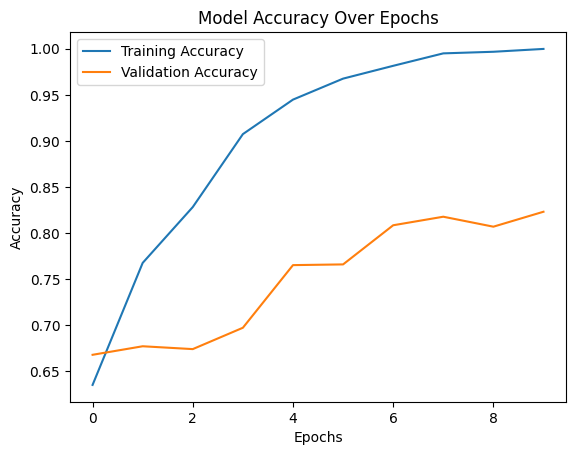

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()

In [25]:
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

41/41 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.8242 - loss: 0.9283
Validation Accuracy: 82.32%


In [26]:
print(train_generator.class_indices)
print(val_generator.class_indices)

{'AD': 0, 'CONTROL': 1, 'PD': 2}
{'AD': 0, 'CONTROL': 1, 'PD': 2}
